In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.shape

(10000, 50)

In [4]:
#Set result rows and columns
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)


#Removing irrelevant columns and columns with more than 5 categorical levels
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1)
df

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,Urban,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [5]:
#Check for any NA values on our dataframe
df.isna().values.any()

False

In [6]:
#Check for any NULL values on our dataframe
df.isnull().values.any()

False

In [7]:
#Getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Area']).head()

,Rural,Suburban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [8]:
#dummies for Area with Rural if both values are 0
area_pd = pd.get_dummies(df['Area'], dtype=np.int64).iloc[:,1:]
area_pd.head()

,Suburban,Urban
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [9]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Marital']).head()

,Divorced,Married,Never Married,Separated,Widowed
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [10]:
#dummies for Marital with Widowed if all 4 values are 0
marital_pd = pd.get_dummies(df['Marital'], dtype=np.int64).iloc[:,:4]
marital_pd.head()

,Divorced,Married,Never Married,Separated
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,1


In [11]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Gender']).head()

,Female,Male,Nonbinary
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [12]:
#dummies for Gender with Nonbinary if both values are 0
gender_pd = pd.get_dummies(df['Gender'], dtype=np.int64).iloc[:,:2]
gender_pd.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [13]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Contract']).head()

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [14]:
#dummies for Contract with Month-to-Month if both values are 0
contract_pd = pd.get_dummies(df['Contract'], dtype=np.int64).iloc[:,1:]
contract_pd.head()

,One year,Two Year
0,1,0
1,0,0
2,0,1
3,0,1
4,0,0


In [15]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['InternetService']).head()

,DSL,Fiber Optic,None
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [16]:
#dummies for InternetService with None if both values are 0
internet_pd = pd.get_dummies(df['InternetService'], dtype=np.int64).iloc[:,:2]
internet_pd.head()

,DSL,Fiber Optic
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [17]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['PaymentMethod']).head()

,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [18]:
#dummies for PaymentMethod with Bank Transfer if all 3 values are 0
payment_pd = pd.get_dummies(df['PaymentMethod'], dtype=np.int64).iloc[:,1:]
payment_pd.head()

,Credit Card (automatic),Electronic Check,Mailed Check
0,1,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [19]:
#Concatinate the new dummy variables with our original dataframe df
initial_df = pd.concat([df, area_pd, marital_pd, gender_pd, contract_pd, internet_pd, payment_pd], axis=1)

#Drop the columns where the dummy variables were applied
concat_df = initial_df.drop(['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod'], axis = 1)
concat_df.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Divorced,Married,Never Married,Separated,Female,Male,One year,Two Year,DSL,Fiber Optic,Credit Card (automatic),Electronic Check,Mailed Check
0,0,68,28561.99,No,7.978323,10,0,1,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.536110,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0
1,1,27,21704.77,Yes,11.699080,12,0,1,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1.156681,242.632554,800.982766,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
2,4,50,9609.57,No,10.752800,9,0,1,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,15.754144,159.947583,2054.706961,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
3,1,48,18925.23,No,14.913540,15,2,0,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,17.087227,119.956840,2164.579412,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1
4,0,83,40074.19,Yes,8.147417,16,2,1,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,1.670972,149.948316,271.493436,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1


In [20]:
#get dummies for all the remailing categorical variables while dropping the first variable that was converted
final_df = pd.get_dummies(concat_df, dtype=np.int64, drop_first=True)
final_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Divorced,Married,Never Married,Separated,Female,Male,One year,Two Year,DSL,Fiber Optic,Credit Card (automatic),Electronic Check,Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0


In [21]:
final_df.dtypes

Children                     int64
Age                          int64
Income                     float64
Outage_sec_perweek         float64
Email                        int64
Contacts                     int64
Yearly_equip_failure         int64
Tenure                     float64
MonthlyCharge              float64
Bandwidth_GB_Year          float64
Suburban                     int64
Urban                        int64
Divorced                     int64
Married                      int64
Never Married                int64
Separated                    int64
Female                       int64
Male                         int64
One year                     int64
Two Year                     int64
DSL                          int64
Fiber Optic                  int64
Credit Card (automatic)      int64
Electronic Check             int64
Mailed Check                 int64
Churn_Yes                    int64
Techie_Yes                   int64
Port_modem_Yes               int64
Tablet_Yes          

In [22]:
final_df.shape

(10000, 38)

In [23]:
#saves our dataframe into a csv file named tree_churn_clean
final_df.to_csv('tree_churn_clean.csv')

In [24]:
#Separate the target and feature variable
X = final_df.drop('Churn_Yes', axis = 1)
y = final_df[['Churn_Yes']]

#split the data into target and features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [25]:
#instantiate the DecisionTreeRegressor as dt
dt = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 0.1, random_state = 15)

#fit dt to the training set
dt.fit(X_train, y_train)

#predict test-set 
y_pred = dt.predict(X_test)

#compute test-set MSE
mse_dt = MSE(y_test, y_pred)

#compute test-set RMSE
rmse_dt = mse_dt**(1/2)

print('The mean squared error is:' ,mse_dt)
print('The root mean squared error is: ', rmse_dt)

The mean squared error is: 0.175
The root mean squared error is:  0.4183300132670378


In [26]:
#checking for over/under fitting
train_pred = dt.predict(X_train)

train_mse_dt = MSE(y_train, train_pred)

print('The root mean squared error for the training set is: ', train_mse_dt**(1/2))
print('The root mean squared error for the test set is: ', rmse_dt)

The root mean squared error for the training set is:  0.4046603514059661
The root mean squared error for the test set is:  0.4183300132670378


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1368,   98],
       [ 252,  282]], dtype=int64)

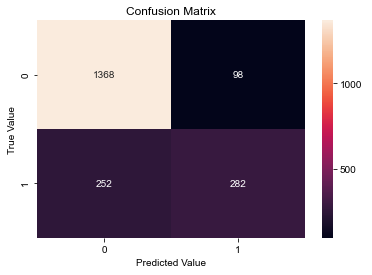

In [28]:
#import seaborn to better show our confusion matrix
import seaborn as sns
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Value')
ax.set_ylabel('True Value');
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
sns.set(font_scale=15)
plt.show()

In [29]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1466
           1       0.74      0.53      0.62       534

    accuracy                           0.82      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.82      0.82      0.81      2000



In [30]:
acu = accuracy_score(y_test, y_pred)
print('Our accuracy score for this model is:', acu*100,'%')

Our accuracy score for this model is: 82.5 %
